# 文字雲(Word Cloud)
- Author: Lynn
- Cretaed: 2020/11/2
- Updated: 2021/4/25
- Ref: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

### 安裝套件

In [ ]:
#!pip install wordcloud

### 載入模組

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 傳入字串產生文字雲

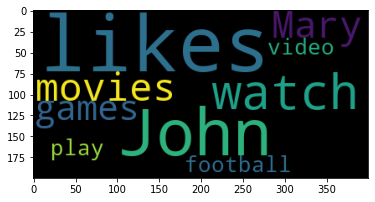

In [ ]:
text = 'John likes to watch movies Mary likes movies too \
John also like to Watch football games \
Mary also likes to play video games'

# 產生文字雲物件
wc = WordCloud()

# 傳入字串
wc.generate(text)

# 畫出文字雲
plt.imshow(wc)

### 傳入詞頻產生文字雲

['John', 'likes', 'to', 'watch', 'movies', 'Mary', 'likes', 'movies', 'too', 'John', 'also', 'like', 'to', 'Watch', 'football', 'games', 'Mary', 'also', 'likes', 'to', 'play', 'video', 'games']
Counter({'likes': 3, 'to': 3, 'John': 2, 'movies': 2, 'Mary': 2, 'also': 2, 'games': 2, 'watch': 1, 'too': 1, 'like': 1, 'Watch': 1, 'football': 1, 'play': 1, 'video': 1})


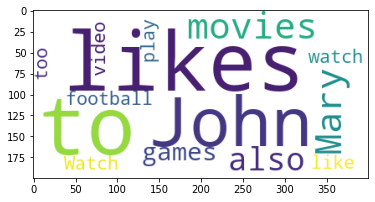

In [ ]:
from collections import Counter

# 分詞
tokens = text.split(' ')
print(tokens)

# 計算次數
ct = Counter(tokens)
print(ct)

# 產生文字雲物件
wc = WordCloud(background_color='white')

# 傳入詞頻
wc.generate_from_frequencies(ct)

# 畫出文字雲
plt.imshow(wc)

### 前處理後產生文字雲

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

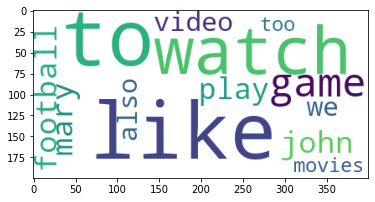

In [ ]:
from collections import Counter
from nltk.stem import WordNetLemmatizer

text = 'John likes to watch football games \
Mary likes to play video games \
We also like to watch movies too'

# 轉小寫
text = text.lower()

# 詞形還原
wnl = WordNetLemmatizer()
tokens = text.split(' ')
tokens = [wnl.lemmatize(token,pos='v') for token in tokens]

# 計算次數(詞頻)
ct = Counter(tokens)

# 產生文字雲
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(ct)
plt.imshow(wc)

## 以 IMDB dataset 為例

### 準備資料

In [ ]:
# 取出電影名稱與電影簡介，各文件之間以空白連接

import pandas as pd

csv = '/content/drive/MyDrive/shared_folder/dataset/imdb/IMDB-Movie-Data.csv'
df = pd.read_csv(csv)
print(df.shape)

docs = df['Description'].tolist()
titles = df['Title'].tolist()
text = ' '.join(titles) + ' '.join(docs)

(1000, 12)


### 產生文字雲

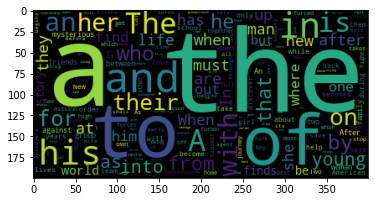

In [ ]:
from collections import Counter

wc = WordCloud(max_words=200)
tokens = text.split(' ')
ct = Counter(tokens)
wc.generate_from_frequencies(ct)
plt.imshow(wc)

### 移除停用字，產生文字雲

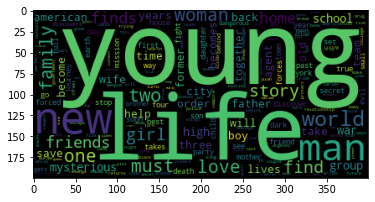

In [ ]:
from gensim.utils import simple_preprocess
from wordcloud import STOPWORDS
from collections import Counter

wc = WordCloud(max_words=200)
processed_tokens = [token for token in simple_preprocess(text) if token not in STOPWORDS]
ct = Counter(processed_tokens)
wc.generate_from_frequencies(ct)
plt.imshow(wc)

### 加詞形還原，產生文字雲

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

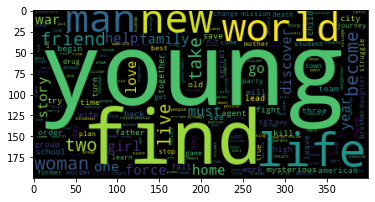

In [ ]:
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS
from collections import Counter

lemmatizer = WordNetLemmatizer()

processed_tokens = []
for token in simple_preprocess(text):
    if token not in STOPWORDS:
        token = lemmatizer.lemmatize(token, pos='v')
        token = lemmatizer.lemmatize(token, pos='n')
        processed_tokens.append(token)

wc = WordCloud(max_words=200)
ct = Counter(processed_tokens)
wc.generate_from_frequencies(ct)
plt.imshow(wc)

## 以科技橘報『AI』報導為例

### 處理中文問題

In [ ]:
# 下載台北思源黑體，並命名taipei_sans_tc_beta.ttf
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2021-05-29 11:31:53--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.216.139, 173.194.216.138, 173.194.216.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dpldut96j4bi3m4aop7et811m3hlc46l/1622287875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-05-29 11:31:54--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dpldut96j4bi3m4aop7et811m3hlc46l/1622287875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

### 準備資料

In [6]:
# 將所有文件(報導)以句點連接
import pandas as pd 
import numpy as np 
#fatoy's path
csv = '/content/drive/MyDrive/AI_&_EdgeComputing_Program/NLP/shared_folder/dataset/techorange_ai.csv'
df = pd.read_csv(csv)
print(df.shape)
print(df.head())
titles = df['title'].apply(str).tolist()
contents = df['content'].apply(str).tolist()
text = '。'.join(titles) + '。' + '。'.join(contents)

(792, 5)
   Unnamed: 0  ...                                            content
0           0  ...  企業走向數位轉型，勢必將越來越依賴網路和系統，連帶  IT  基礎架構也必須有所轉變，才能滿...
1           1  ...  （本文經合作夥伴中央社授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為...
2           2  ...   （本文經合作夥伴 大數據文摘 授權轉載，並同意 TechOrange 編寫導讀與修訂標題，...
3           3  ...  （本文經合作夥伴 unwire.hk 授權轉載，並同意 TechOrange 編寫導讀與修訂...
4           4  ...  新冠疫情爆發前，AI 與機器學習就開始滲透各種產業，改變商業模式與生活樣貌；新冠疫情爆發後，...

[5 rows x 5 columns]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 分詞

In [4]:
import jieba

tokens = jieba.lcut(text)
print(tokens[:10])
print(len(tokens))

# 分詞後以空白連接
new_text = ' '.join(tokens)
print(new_text)

NameError: ignored

### 產生文字雲

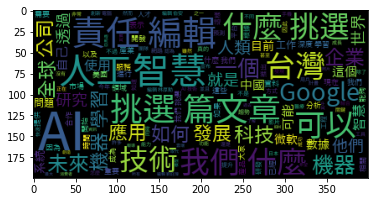

In [ ]:
wc = WordCloud(max_words=200,
               font_path='./taipei_sans_tc_beta.ttf')
wc.generate(new_text)
plt.imshow(wc)

### 去停用詞，產生文字雲

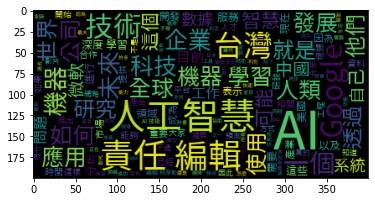

In [ ]:
from wordcloud import STOPWORDS

my_stop_words = ['什麼','可以','我們','挑選','篇文章']
stopwords = list(STOPWORDS) + my_stop_words

wc = WordCloud(max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords)
wc.generate(new_text)
plt.imshow(wc)

### 自訂背景設產生文字雲

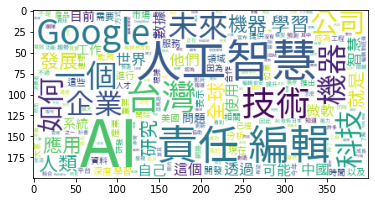

In [ ]:
wc = WordCloud(background_color='white',
               max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords)
wc.generate(new_text)
plt.imshow(wc)

### 加遮罩(Mask)產生文字雲

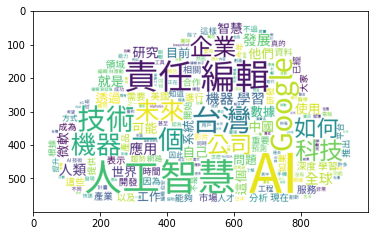

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open('/content/drive/MyDrive/shared_folder/wordcloud/mask.png'))

wc = WordCloud(background_color='white',
               max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords,
               mask=mask)
wc.generate(new_text)
plt.imshow(wc)

### 去座標軸

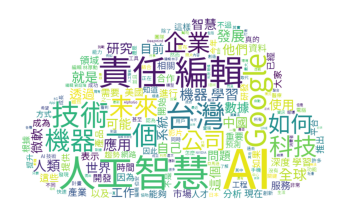

In [ ]:
plt.axis("off")
plt.imshow(wc)

### 儲存檔案

In [ ]:
wc.to_file('/content/drive/MyDrive/shared_folder/cloudwords.png')

### 小練習

In [ ]:
### TODO ###
# 將『科技橘報』範例，由輸入字串(generate)改為輸入詞頻(generate_from_frequence)